# Gold Price Analysis Project
## Data Source & Attribution

This analysis is based on the **Historical Gold Prices (1995–2026)** provided by [Kaggle](https://www.kaggle.com/).

* **Dataset Source:** https://www.kaggle.com/datasets/mr1rameez/historical-gold-prices-19952026
* **License:** [Creative Commons Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)
* **Author/Publisher:** Muhammad Rameez

> **Notice:** As required by the CC BY 4.0 license, any modifications, data cleaning, or transformations performed on the original dataset are documented in the code sections below.

## Project Overview

In this project, I analyzed **gold prices from August 2000 to February 2026**

The data was **downloaded as a CSV file from Kaggle**, and an initial inspection was performed using **pandas** to check for missing values, data issues, and to verify that the data types were appropriate for the analysis.  

Once the data was prepared, I performed a **analysis**:  
- Plotted gold prices over the entire period and performed analysis and created **visualizations** to observe trends.
-  Calculated **Custom Gold Return Periods** over different intervals and performed analysis along with corresponding visualizations.    
- Computed **Annualized Volatility** for different periods, along with analysis and visual representations.  

All **visualizations were created using Matplotlib**.  

The analysis was conducted purely from a **mathematical perspective**, focusing on numerical patterns and statistical measures, without considering any economic reasons or external factors affecting gold prices.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np

**Note:** In the previous cell, we imported the necessary libraries for our analysis:  

- **pandas**: for data manipulation and handling the DataFrame.  
- **matplotlib.pyplot**: for creating visualizations and plots of the gold price data.  
- **seaborn**: a Python library used to create professional and attractive statistical visualizations with simple code.  
- **matplotlib.dates**: provides tools for handling and formatting dates on plots.  
- **matplotlib.ticker**: used to control and customize axis tick locations and formatting.


In the next cell, we load the gold price dataset from a CSV file into a Pandas DataFrame called `df`.  
The dataset contains monthly gold prices from August 2000 to February 2026.  
Using Pandas, we can easily manipulate and analyze the data, and visualize it with Matplotlib.

In [2]:
df = pd.read_csv('Dataset/gold_prices_aug_2000_2026_feb.csv')

In [3]:
df.head(10)

,Date,Gold_Price_USD_YFinance
0,2000-08-01,276.099991
1,2000-09-01,273.389996
2,2000-10-01,269.809090
3,2000-11-01,265.874997
4,2000-12-01,271.515005
5,2001-01-01,265.371427
6,2001-02-01,261.805263
7,2001-03-01,262.290907
8,2001-04-01,261.079997
9,2001-05-01,272.077272


In the previous cell, we use `df.head(10)` to display the first 10 rows of the DataFrame.  
This allows us to quickly inspect the structure of the data, check the column names.

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     307 non-null    str    
 1   Gold_Price_USD_YFinance  307 non-null    float64
dtypes: float64(1), str(1)
memory usage: 4.9 KB


Using df.info() gives the following information about the DataFrame: 

The dataset contains 307 rows and 2 columns. The columns are:

Date – 307 non-null entries, type str (dates stored as text)

Gold_Price_USD_YFinance – 307 non-null entries, type float64 (gold prices in USD)

The DataFrame uses approximately 4.9 KB of memory.

There are no missing values, so the dataset is complete. You may consider converting the Date column to datetime for easier time-series analysis.

Note: The Date column is currently stored as strings. To perform time-series analysis, it is recommended to convert it to datetime format using pd.to_datetime().

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     307 non-null    datetime64[us]
 1   Gold_Price_USD_YFinance  307 non-null    float64       
dtypes: datetime64[us](1), float64(1)
memory usage: 4.9 KB


Now we have converted the Date column to datetime,and we used the df.info() function to comfirm,Now we will sort the dates from oldest to newest in the next cell. This ensures that any issues with date order are resolved.

In [7]:
df = df.sort_values('Date')

In [8]:
df.head()

,Date,Gold_Price_USD_YFinance
0,2000-08-01,276.099991
1,2000-09-01,273.389996
2,2000-10-01,269.809090
3,2000-11-01,265.874997
4,2000-12-01,271.515005


In the next cell, we will change the index to the dataframe from 0,1,2,... to the dates in the data frame

In [9]:
df.set_index('Date', inplace=True)

In [10]:
df.head(10)

,Gold_Price_USD_YFinance
Date,
2000-08-01,276.099991
2000-09-01,273.389996
2000-10-01,269.809090
2000-11-01,265.874997
2000-12-01,271.515005
2001-01-01,265.371427
2001-02-01,261.805263
2001-03-01,262.290907
2001-04-01,261.079997


**Note:** After setting the `Date` column as the index, we need to ensure that all dates are unique. 
Duplicated dates can cause issues in time-series analysis, such as incorrect plots, wrong calculations 
for moving averages or returns, and problems with resampling or rolling operations. 

The following cell checks for any duplicated dates in the index to make sure our data is safe for analysis.


In [11]:
df.index.duplicated().sum()

np.int64(0)

df.index.duplicated().sum() returns np.int64(0), it simply means there are zero duplicated dates in the DataFrame index.

## **Data Ready for Analysis:**  

The `Date` column has been converted to `datetime`, sorted from oldest to newest, and set as the DataFrame index.  
There are no missing values, and all dates are unique.  

This means the dataset is now clean and properly structured, and it is ready for time-series analysis, plotting, and calculation of returns, moving averages, or volatility.


# Data Exploration and Analysis
Now that the dataset is ready for analyse, we can proceed with the analysis. 
The goal is to understand the historical trends of gold prices from August 2000 to February 2026 and identify any significant patterns.


## Visualizing Gold Prices Over Time

In the **next cell**, we will create a line plot using matplotlib to show the monthly gold prices from August 2000 to February 2026. 
This visualization will help us quickly see the overall trend, identify periods of increase or decrease, 
and gain an initial understanding of the behavior of gold prices over time.

We used the seaborn library:Seaborn is a Python library used to create professional and attractive statistical visualizations with simple code.

We used `matplotlib.dates` to access tools for handling and formatting dates on plots.

We import Matplotlib’s `ticker` module to control and customize axis tick locations and formatting.

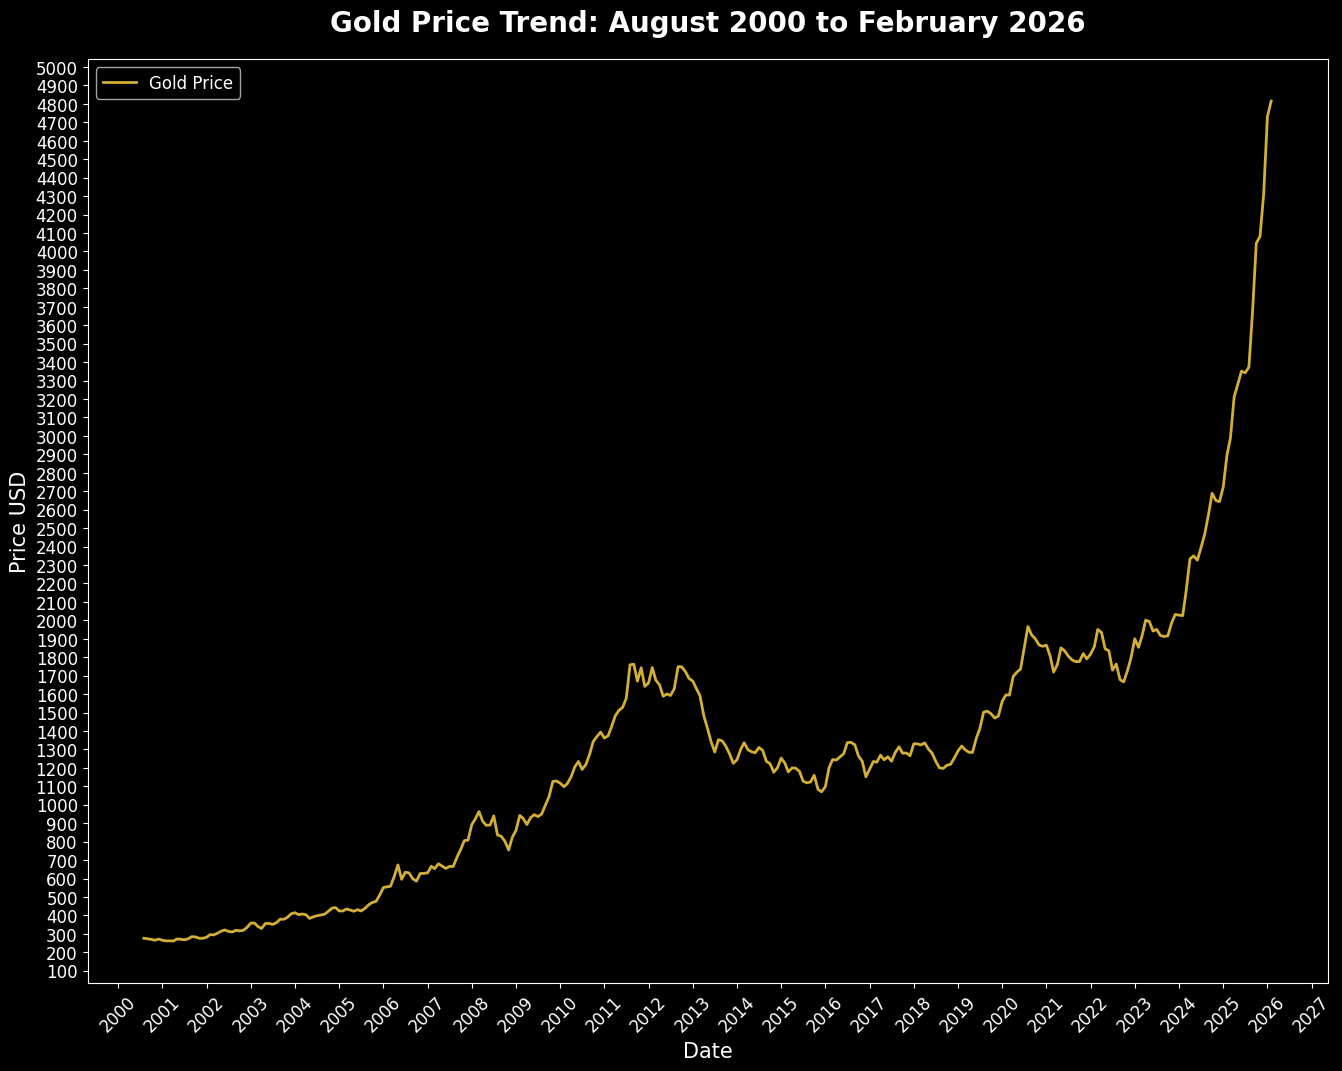

In [26]:
plt.style.use('dark_background')
plt.figure(figsize=(16, 12))

plt.plot(df.index, df['Gold_Price_USD_YFinance'], color='#D4AF37', linewidth=2, label='Gold Price')

plt.title("Gold Price Trend: August 2000 to February 2026", fontsize=20, fontweight='bold', pad=20)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Price USD", fontsize=15)

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(100))

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc='upper left', fontsize=12)
plt.show()

### Explanation of the Gold Price Plot

- `sns.set_theme(style="darkgrid")`  
  Applied a dark grid theme to the plot.

- `plt.figure(figsize=(16, 16))`  
  Created a new figure with a size of 16 inches wide and 16 inches tall.

- `plt.plot(df.index, df['Gold_Price_USD_YFinance'], color='#D4AF37', linewidth=2, label='Gold Price')`  
  Plotted the gold prices over time. The line is colored gold, and labeled 'Gold Price' for the legend.

- `plt.title("Gold Price Trend: August 2000 to February 2026", fontsize=20, fontweight='bold', pad=20)`  
  Added a title describing the data, with a large, bold font, and extra padding to separate the title from the plot area.

- `plt.xlabel("Date", fontsize=15)` & `plt.ylabel("Price USD", fontsize=15)`  
  Labeled the x-axis as "Date" and the y-axis as "Price USD".

- `plt.xticks(fontsize=12)` & `plt.yticks(fontsize=12)`  
  Adjusted the size of the tick labels on both axes.

- `plt.gca().xaxis.set_major_locator(mdates.YearLocator())`  
  Set a major tick on the x-axis for each year.

- `plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))`  
  Formatted the x-axis to display only the year.

-  `plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(100))`  
Sets the y-axis to display major tick marks every 100 units.


- `plt.legend(fontsize=12)`  
  Displaying the legend.


### Analyse the Gold Price Trend: August 2000 to February 2026 plot:

#### August 2000 – Beginning of 2008
From the curve, we observe that the price of gold started at around 300 USD in August 2000, then gradually rose to about 960 USD at the beginning of 2008.
#### Beginning of 2008 – End of 2008
It then began to decline until the end of 2008, reaching around 750 USD.

#### End of 2008 – Mid-2011
It then started to rise again until mid-2011, reaching around 1760 USD.

#### Mid-2011 – End of 2012
It then experienced periods of price stability until the end of 2012, reaching around 1750 USD.

#### End of 2012 – Mid-2013
The price of gold then began to decline until mid-2013, reaching around 1290 USD.

#### Mid-2013 – May 2019
It then experienced periods of decline and rise until May 2019. Throughout this period, the maximum difference between the highest and lowest prices was around 250 USD.

#### May 2019 – August 2020
It then began to rise from around 1280 USD in May 2019 to around 1970 USD in August 2020.

#### August 2020 – Beginning of 2024
It then experienced periods of decline and rise until the beginning of 2024, with the difference between the lowest and highest values during this period reaching approximately From 300 USD.

#### Beginning of 2024 – February 2026
then starting in 2024, it began a very significant rise, reaching approximately 4800 USD in February 2026.


### Yearly Returns Calculation

Here, we calculate the percentage change in gold prices from the end of one year to the end of the next.
This helps us see the overall yearly performance, showing clear trends and major rises or drops over the years.

In [13]:
price_series = df['Gold_Price_USD_YFinance']

dates = [pd.Timestamp('2000-08-01'),
         pd.Timestamp('2000-12-01')]
dec_years = range(2001, 2026)   
for y in dec_years:
    dates.append(pd.Timestamp(f'{y}-12-01'))

dates.append(price_series.index[-1])
selected_prices = price_series.reindex(dates, method='nearest')
returns = selected_prices.pct_change() * 100
returns = returns.iloc[1:]
periods = [
    f"{selected_prices.index[i-1].strftime('%d-%b-%Y')} - "
    f"{selected_prices.index[i].strftime('%d-%b-%Y')}"
    for i in range(1, len(selected_prices))
]
print(returns)

Date
2000-12-01    -1.660625
2001-12-01     1.653780
2002-12-01    21.352067
2003-12-01    22.052406
2004-12-01     8.296057
2005-12-01    15.097344
2006-12-01    23.254256
2007-12-01    28.646833
2008-12-01     1.820410
2009-12-01    37.233615
2010-12-01    23.470558
2011-12-01    17.791981
2012-12-01     2.583081
2013-12-01   -27.272378
2014-12-01    -2.027849
2015-12-01   -10.850372
2016-12-01     7.612518
2017-12-01     9.916209
2018-12-01    -0.989486
2019-12-01    18.180079
2020-12-01    25.555759
2021-12-01    -3.670745
2022-12-01     0.338844
2023-12-01    13.052075
2024-12-01    30.118299
2025-12-01    63.076493
2026-02-01    11.701864
Name: Gold_Price_USD_YFinance, dtype: float64


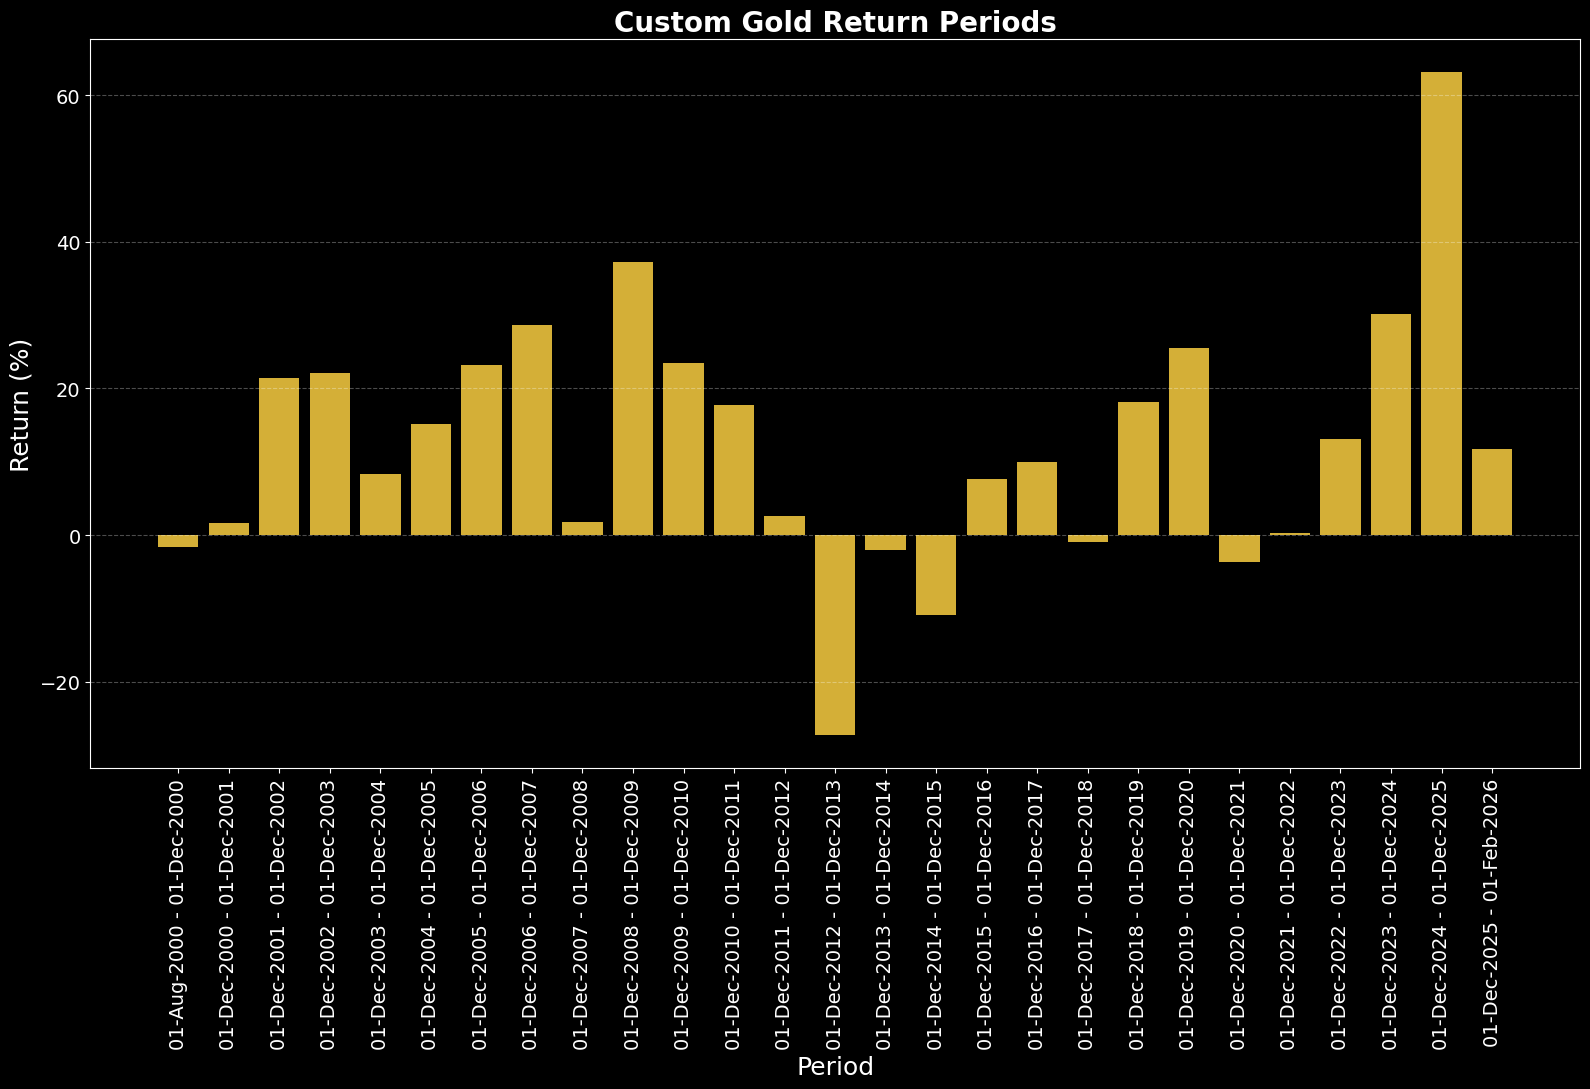

In [14]:
plt.style.use('dark_background')

plt.figure(figsize=(16,11))
plt.bar(periods, returns, color='#D4AF37')

plt.title("Custom Gold Return Periods", fontsize=20, weight='bold')
plt.xlabel("Period", fontsize=18)
plt.ylabel("Return (%)", fontsize=18)

plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


### Custom gold return periods bar chart analyse:
We can observe that most periods in the chart recorded a positive rate of change in gold prices.

The periods that showed a clearly negative rate of change are two:

- From December 1, 2012 to December 1, 2013, this period recorded a significant decrease in the price of gold of approximately -27%.
- From December 1, 2014 to December 1, 2015, this period recorded a considerable decline of around -10%.

The periods that recorded an almost negligible rate of change are:

- From August 1, 2000 to December 1, 2001.
- From December 1, 2007 to December 1, 2008.
- From December 1, 2011 to December 1, 2012.
- From December 1, 2013 to December 1, 2014.
- From December 1, 2017 to December 1, 2018.
- From December 1, 2020 to December 1, 2022.

All other periods recorded a positive rate of change, especially from December 1, 2024 to February 1, 2026.

The period from December 1, 2025 to February 1, 2026 does not appear to show a significantly large positive change; however, since the duration was short (only two months), it can be considered a relatively large rate of change in relation to the time span.


### Annualized Volatility of Gold Prices

In this section, we calculate the **annualized volatility of gold prices** from 2000 to 2026.

Annualized volatility measures the **expected fluctuation of gold prices over a year**, taking into account periods of different lengths:

- A higher value indicates that prices **experienced larger swings**, reflecting more uncertainty.
- A lower value suggests that prices **remained relatively stable** over the period.

By using annualized volatility, we can fairly compare periods of varying lengths and identify **times of high or low market instability**.


In [15]:
cut_off_dates = ["2000-08-01"] 
cut_off_dates += [f"{year}-12-01" for year in range(2000, 2026)]
cut_off_dates.append("2026-02-01")

results = []

for i in range(len(cut_off_dates) - 1):
    start_dt = pd.to_datetime(cut_off_dates[i])
    end_dt = pd.to_datetime(cut_off_dates[i+1])
    
    mask = (df.index >= start_dt) & (df.index <= end_dt)
    period_data = df.loc[mask, 'Gold_Price_USD_YFinance']
    
    n_months = len(period_data)
    
    if not period_data.empty:
        std_val = period_data.std()
        annualized_std = std_val * np.sqrt(12 / n_months)
        
        label_start = start_dt.strftime('%d-%m-%Y')
        label_end = end_dt.strftime('%d-%m-%Y')
        label = f"{label_start}  {label_end}"
        
        results.append({
            'Period': label,
            'Standard Deviation': std_val,
            'Annualized Volatility': annualized_std
        })

volatility_display = pd.DataFrame(results).set_index('Period')

volatility_display

,Standard Deviation,Annualized Volatility
Period,,
01-08-2000 01-12-2000,3.843844,5.954857
01-12-2000 01-12-2001,7.672613,7.371608
01-12-2001 01-12-2002,16.727656,16.071412
01-12-2002 01-12-2003,22.470662,21.589113
01-12-2003 01-12-2004,16.668525,16.014601
01-12-2004 01-12-2005,26.282214,25.251134
01-12-2005 01-12-2006,44.354636,42.614556
01-12-2006 01-12-2007,60.940907,58.550129
01-12-2007 01-12-2008,61.873197,59.445845


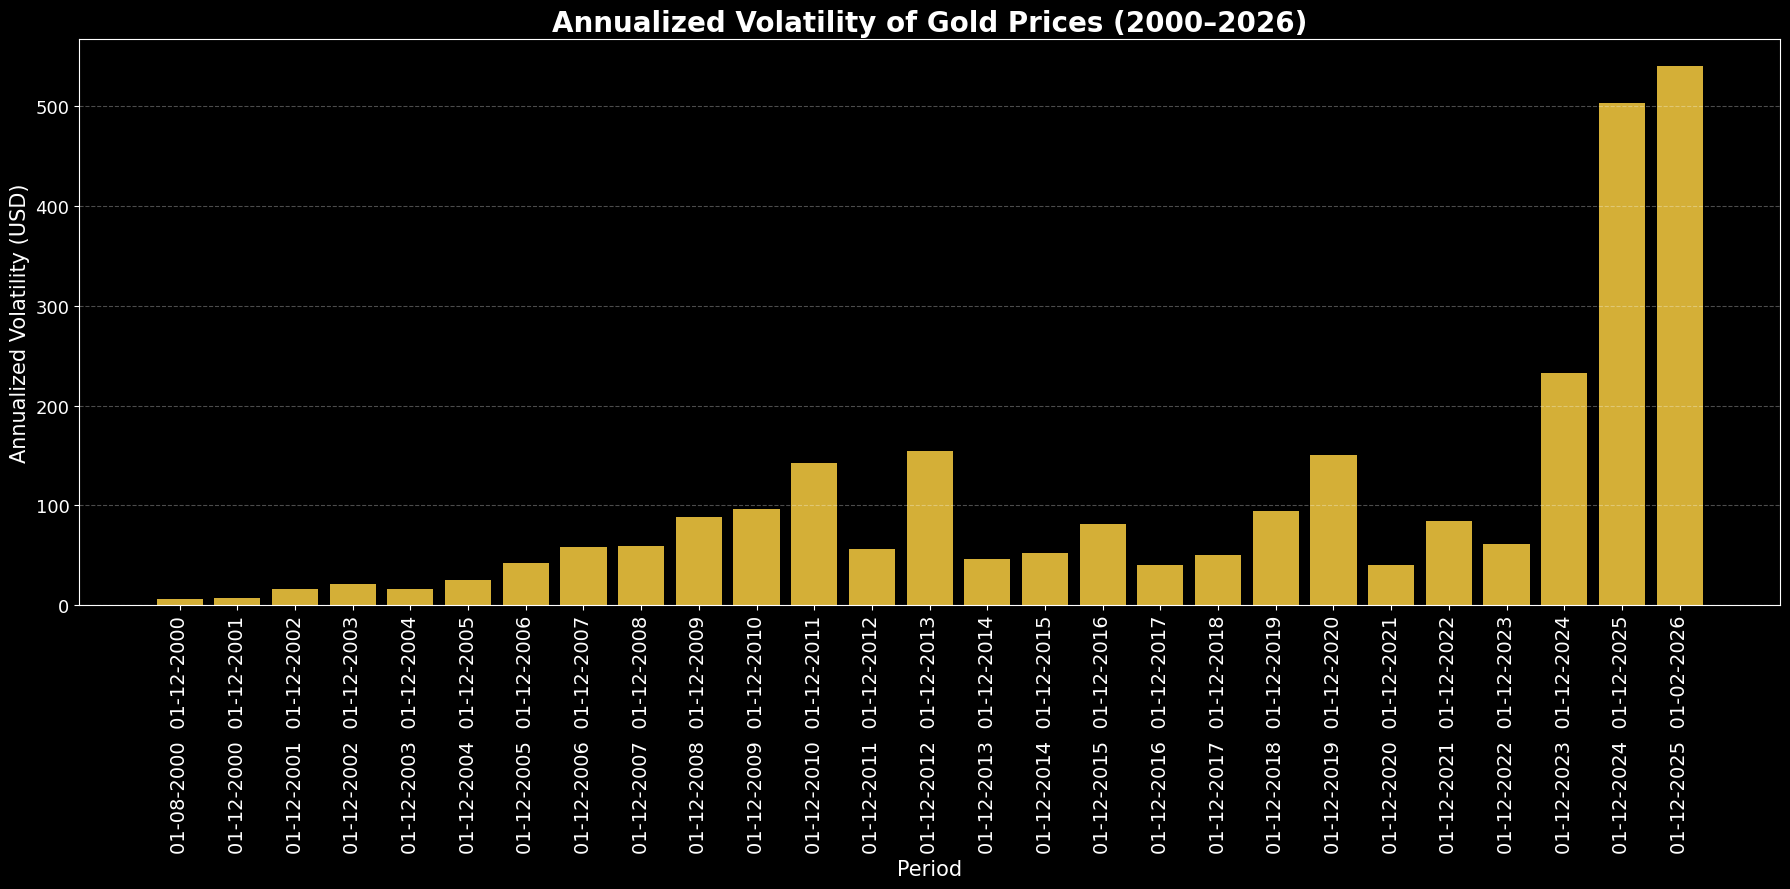

In [16]:
plt.style.use('dark_background')

plt.figure(figsize=(18,9))

plt.bar(
    volatility_display.index,
    volatility_display['Annualized Volatility'],
    color='#D4AF37'
)

plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=13)

plt.title('Annualized Volatility of Gold Prices (2000–2026)', fontsize=20, weight='bold')
plt.ylabel('Annualized Volatility (USD)', fontsize=15)
plt.xlabel('Period', fontsize=15)

plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


Note: We used **Annualized Volatility** instead of the standard deviation of prices because our periods have **different lengths** (some periods are 13 months, others 3 or 4 months). 

Annualized volatility **adjusts the standard deviation to a yearly scale**, allowing us to fairly compare periods of varying lengths. 

This makes it possible to identify periods of high or low gold price fluctuations consistently, regardless of the number of months in each period.

### Annualized Volatility of Gold Prices (2000–2026)
By calculating these statistics, we can compare periods **relative to each other** in terms of Annualized Volatility. 

- Quantiles allow us to see which periods had **higher or lower volatility compared to the rest of the dataset**.  
- However, being above a certain quantile (e.g., 75% or 90%) does **not necessarily mean the period was economically highly volatile**, because volatility is a relative statistical measure, not an absolute economic judgment.  
- In this analysis, we **do not consider economic reasons** behind the fluctuations; we focus solely on the numerical volatility values.

This helps interpret periods **in the context of the historical data**.


In [17]:
mean_vol = volatility_display['Annualized Volatility'].mean()

q25 = volatility_display['Annualized Volatility'].quantile(0.25)
q50 = volatility_display['Annualized Volatility'].quantile(0.50)
q75 = volatility_display['Annualized Volatility'].quantile(0.75)

print("Mean Annualized Volatility:", mean_vol)
print("25% Quantile:", q25)
print("50% Quantile (Median):", q50)
print("75% Quantile:", q75)

Mean Annualized Volatility: 102.57566935721022
25% Quantile: 40.580865321630256
50% Quantile (Median): 58.55012928781156
75% Quantile: 95.73412122954788


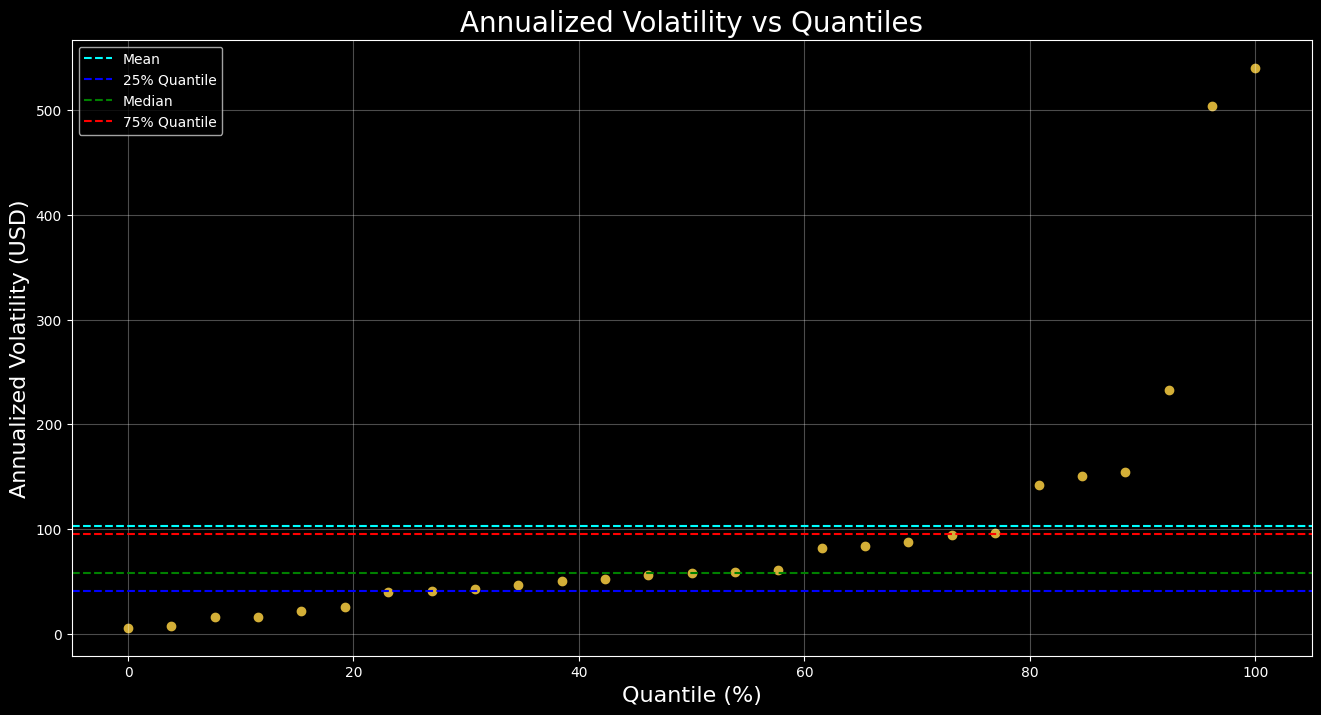

In [25]:
vol_sorted = volatility_display['Annualized Volatility'].sort_values()
quantiles = np.linspace(0, 100, len(vol_sorted))

plt.figure(figsize=(16,8))
plt.scatter(quantiles, vol_sorted, color='#D4AF37')

plt.axhline(y=mean_vol, color='cyan', linestyle='--', label='Mean')
plt.axhline(y=q25, color='blue', linestyle='--', label='25% Quantile')
plt.axhline(y=q50, color='green', linestyle='--', label='Median')
plt.axhline(y=q75, color='red', linestyle='--', label='75% Quantile')

plt.title("Annualized Volatility vs Quantiles", fontsize=20)
plt.xlabel("Quantile (%)", fontsize=16)
plt.ylabel("Annualized Volatility (USD)", fontsize=16)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

The scatter plot shows the **Annualized Volatility values** of gold prices across all periods.

Most points are below the average because a few  high values raise the mean, while the majority of values remain lower.